In [1]:
import zipfile

In [2]:
data_path = 'D:/nlp/tensorflow-ml-nlp-tf2/5.TEXT_SIM/data_in/'

In [4]:
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for f in file_list:
    zipref = zipfile.ZipFile(data_path + f, 'r')
    zipref.extractall(data_path)
    zipref.close()


In [5]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
td = pd.read_csv(data_path + 'train.csv')
td.head(20)
# td.tail()
# td.info()
# td.describe()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [8]:
print(len(td))

404290


### 질문 중복분석

In [18]:
train_set = pd.Series(td['question1'].tolist() + td['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [20]:
train_set.head(20)

0     What is the step by step guide to invest in sh...
1     What is the story of Kohinoor (Koh-i-Noor) Dia...
2     How can I increase the speed of my internet co...
3     Why am I mentally very lonely? How can I solve...
4     Which one dissolve in water quikly sugar, salt...
5     Astrology: I am a Capricorn Sun Cap moon and c...
6                                   Should I buy tiago?
7                        How can I be a good geologist?
8                       When do you use シ instead of し?
9     Motorola (company): Can I hack my Charter Moto...
10    Method to find separation of slits using fresn...
11          How do I read and find my YouTube comments?
12                 What can make Physics easy to learn?
13          What was your first sexual experience like?
14    What are the laws to change your status from a...
15    What would a Trump presidency mean for current...
16                         What does manipulation mean?
17    Why do girls want to be friends with the g

#### np.unique =  배열 내 중복된 원소 제거 후 유일한 원소를 정렬하여 반환
#### Series.value_counts(normalize=False, # False면 개수, True면 상대 비율 구함
####                        sort=True, # True면 개수 기준 정렬, False면 유일한 값 기준 정렬
####                       ascending=False, # False면 내림차순 정렬, True면 오름차순 정렬
####         bins=None, # None이면 유일값 기준 개수, None아니면 Bins Group별 개수
####                             dropna=True # True면 NaN 무시, False면 유일값에 NaN 포함)


In [22]:
print('데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


c:\users\bitcamp\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Number of questions')

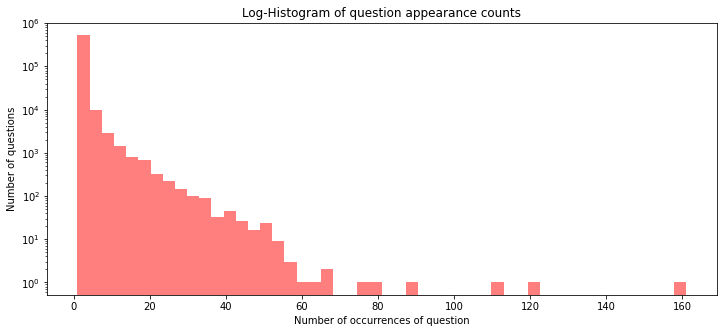

In [23]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [24]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1363a258bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x136576de508>,
 'boxes': [<matplotlib.lines.Line2D at 0x1363a299b08>],
 'medians': [<matplotlib.lines.Line2D at 0x13619145c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1363a276488>],
 'means': [<matplotlib.lines.Line2D at 0x1363a25e308>]}

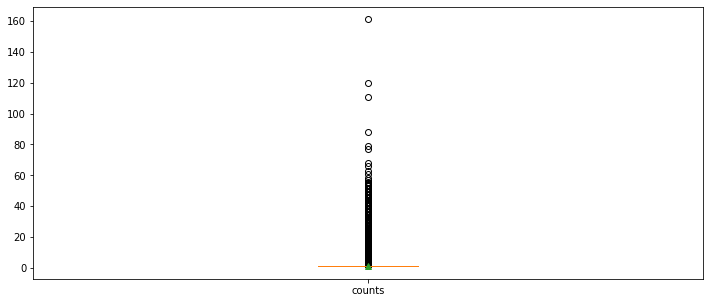

In [25]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

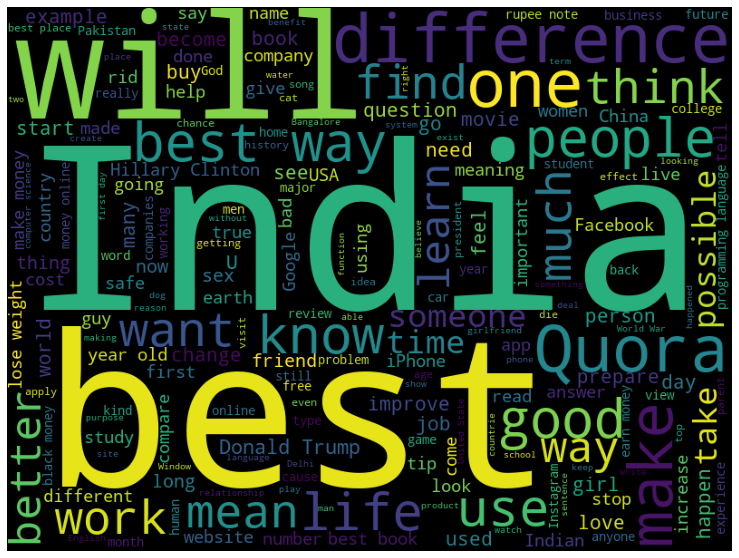

In [37]:
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

c:\users\bitcamp\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

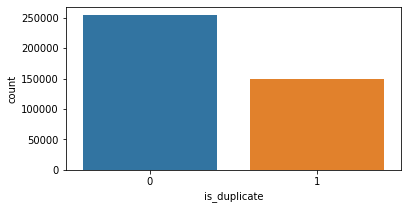

In [27]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(td['is_duplicate'])

In [28]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

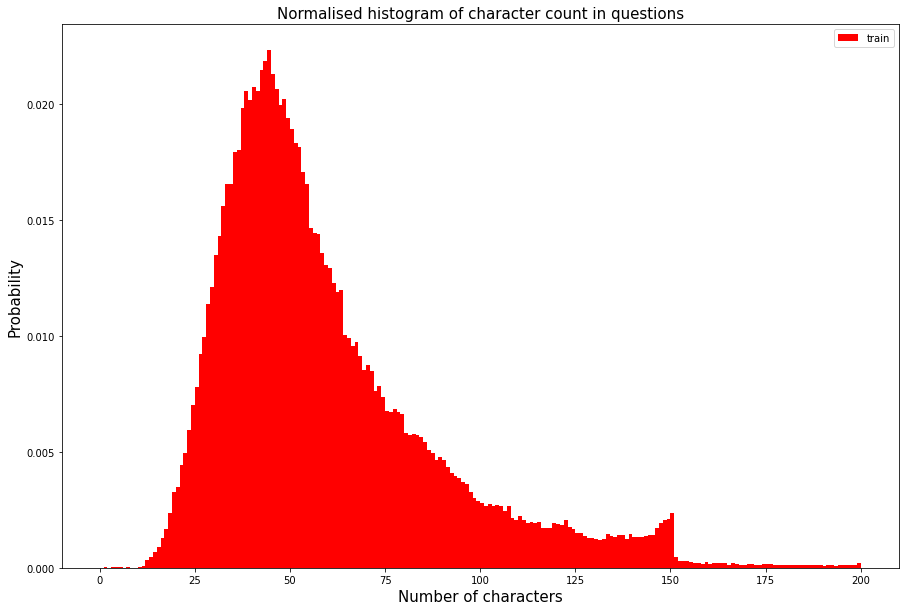

In [29]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [30]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x136513303c8>,
 'caps': [<matplotlib.lines.Line2D at 0x13651310b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1365130fe08>],
 'medians': [<matplotlib.lines.Line2D at 0x13651318948>],
 'fliers': [<matplotlib.lines.Line2D at 0x13651333f48>],
 'means': [<matplotlib.lines.Line2D at 0x13651318b48>]}

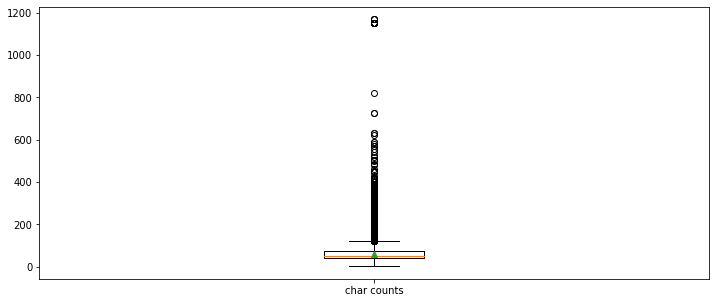

In [31]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [32]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Probability')

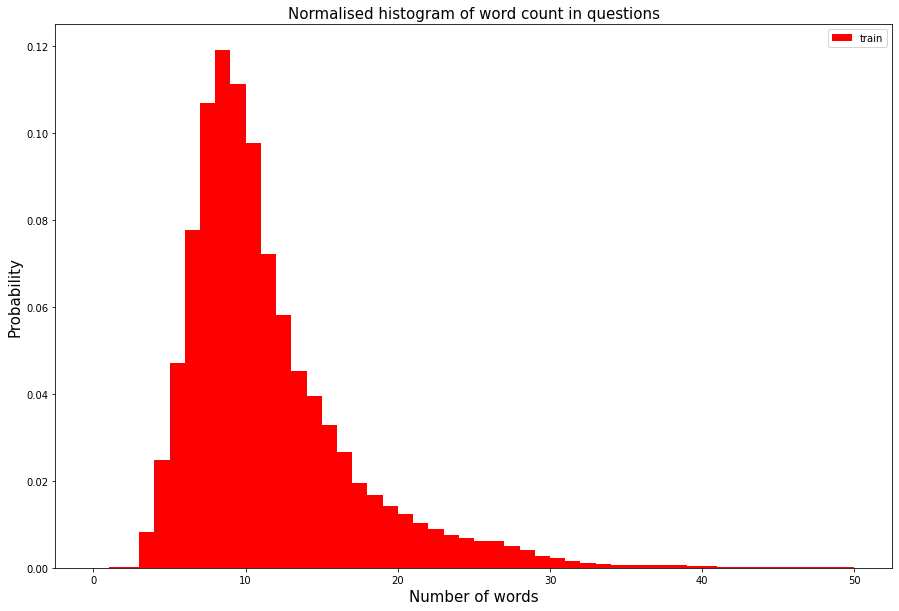

In [34]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [38]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x13650fd1ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x136516d1048>,
 'boxes': [<matplotlib.lines.Line2D at 0x136516d1308>],
 'medians': [<matplotlib.lines.Line2D at 0x13669e77388>],
 'fliers': [<matplotlib.lines.Line2D at 0x13669e773c8>],
 'means': [<matplotlib.lines.Line2D at 0x13669e77fc8>]}

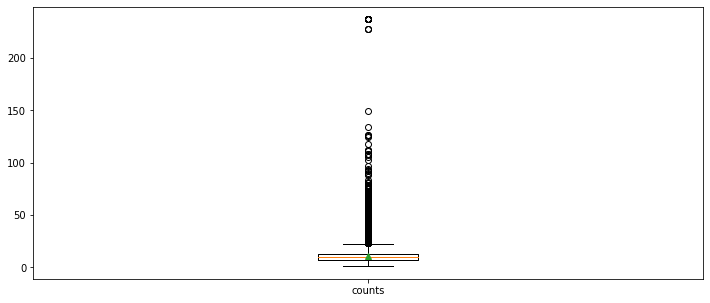

In [39]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [40]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%
